# Precision-Recall Graph
* 이 그래프는 x축을 재현율로 y축을 정밀도로 두어 이차원 평면 상에 결과를 표시한 것입니다. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

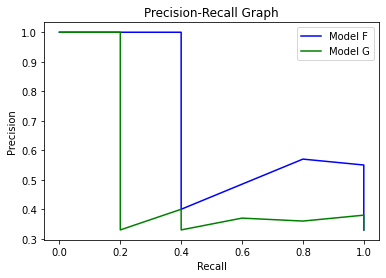

In [3]:
plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')   
plt.plot(recall_G, precision_G, 'g', label = 'Model G') 

plt.legend(loc='upper right')
plt.show()

* 이러한 그래프를 하나의 수치로 나타낸 것이 AP(Average Precision)이라고 합니다. 
    * 이는 각 재현율에 해당하는 정밀도을 더해서 평균을 취한 것입니다. 
* sklearn 패키지는 Precision-Recall Graph 및 AP를 좀 더 쉽게 구할 수 있는 함수를 제공합니다. 
    * 임계값 변화에 따른 정밀도, 재현율을 계산해서 입력할 필요없이, 클래스 값과 모델에서 나오는 클래스 확률 값을 그대로 입력하면 됩니다.

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

In [5]:
class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

In [6]:
precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

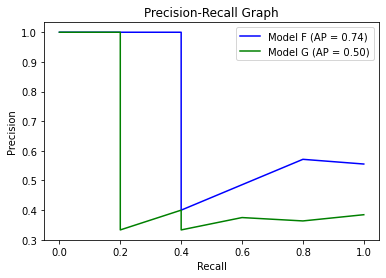

In [7]:
plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)   
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)  

plt.legend(loc='upper right')
plt.show()